In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Plotagem do que foi encontrado no computador

In [2]:
LiF_refined = pd.read_csv("LiF_refined.txt", sep='\s+')
KBr_refined = pd.read_csv("KBr_refined.txt", sep='\s+')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_14821/3115211537.py:1: SyntaxWarning: invalid escape sequence '\s'
  LiF_refined = pd.read_csv("LiF_refined.txt", sep='\s+')
/tmp/ipykernel_14821/3115211537.py:2: SyntaxWarning: invalid escape sequence '\s'
  KBr_refined = pd.read_csv("KBr_refined.txt", sep='\s+')


In [3]:
LiF_refined

,angulo,ocorrencias
0,3.0,45.0
1,3.1,35.0
2,3.2,19.0
3,3.3,16.0
4,3.4,20.0
...,...,...
516,54.6,3.0
517,54.7,7.0
518,54.8,5.0
519,54.9,6.0


In [4]:
KBr_refined

,angulo,ocorrencias
0,3.0,981.0
1,3.1,735.0
2,3.2,555.0
3,3.3,435.0
4,3.4,397.0
...,...,...
716,74.6,40.0
717,74.7,33.0
718,74.8,29.0
719,74.9,34.0


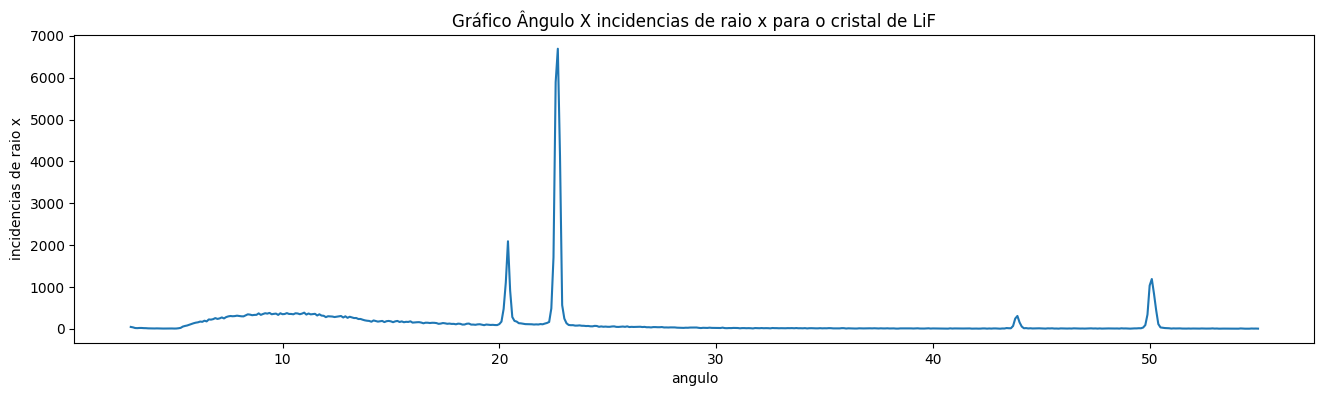

In [5]:
plt.figure(figsize=(16,4))
plt.title("Gráfico Ângulo X incidencias de raio x para o cristal de LiF")
plt.ylabel("incidencias de raio x")
sns.lineplot(x='angulo', y='ocorrencias', data=LiF_refined)
plt.show()

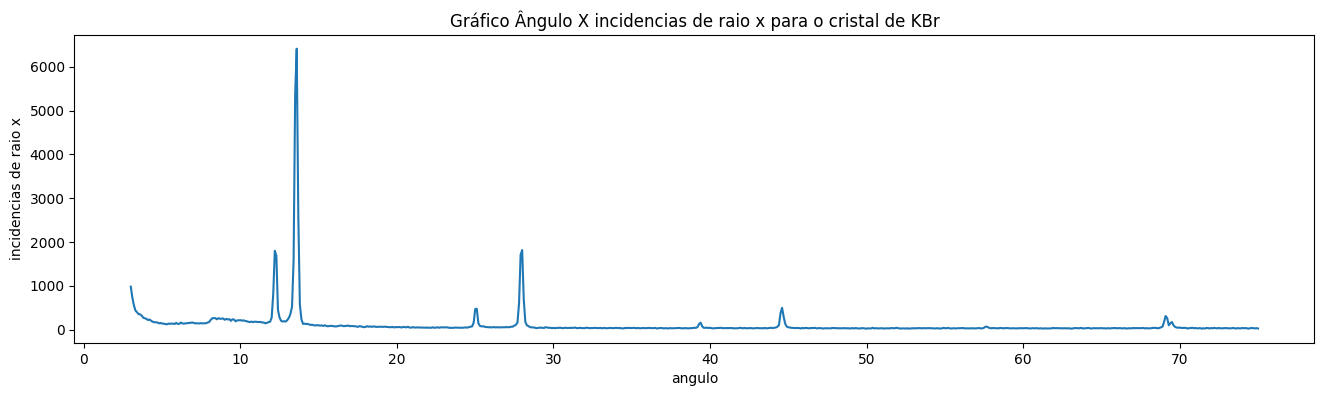

In [6]:
plt.figure(figsize=(16,4))
plt.title("Gráfico Ângulo X incidencias de raio x para o cristal de KBr")
plt.ylabel("incidencias de raio x")
sns.lineplot(x='angulo', y='ocorrencias', data=KBr_refined)
plt.show()

In [7]:
corrente = 0.6 # mA
temp_integracao = 2 # s (gate), 
v = 35 # kV

In [8]:
# IO medidas de intensidades  (Qual a unidade)

# lembrando que sem a lamina de aluminio utilizamos corrente = 1 mA

medidas_LiF = {
    "angulo" : [20.3, 22.6],
    "IO_sem": [[1206, 1234, 1212, 1272, 1268], [4140, 4379, 4242, 4284, 4220]],
    "IO_com_al (0.02mm)": [[1004, 1018, 1010, 937, 1027], [3410, 3434, 3443, 3481, 3338]],
    "IO_com_al (0.04mm)": [[831, 748, 879, 819, 866], [2700, 2685, 2677, 2751, 2804]],
    "IO_com_al (0.06mm)": [[700, 680, 669, 696, 688], [2040, 2141, 2150, 2113, 2125]],
    "IO_com_al (0.08mm)": [[576, 525, 536, 542, 554], [1618, 1640, 1571, 1612, 1605]],
    "IO_com_al (0.10mm)": [[509, 503, 504, 518, 507], [1431, 1455, 1400, 1444, 1450]],
    "IO_com_al (0.12mm)": [[418, 448, 399, 412, 426], [1109, 1096, 1119, 1071, 1117]],
    "IO_com_al (0.14mm)": [[311, 300, 321, 339, 338], [880, 825, 875, 917, 887]],
    "IO_com_al (0.16mm)": [[278, 266, 291, 271, 285], [615, 690, 636, 664, 691]],
    "IO_com_al (0.18mm)": [[221, 236, 219, 241, 248], [512, 467, 498, 480, 502]],
}
        

In [9]:
# não era necessário
medidas_Kbr = {
    "Angulo": [12.3, 13.6],
    "IO_sem": [[1214, 1226, 1200, 1161, 1217], [4137, 4144, 4074, 4071, 4110]],
    "IO_com_al (0.02mm)": [[920, 1036,  982, 945, 966], [3311, 3250, 3202, 3271, 3269]],
    "IO_com_al (0.04mm)": [[810, 826, 787, 775, 825], [2568, 2545, 2587, 2616, 2601]],
    "IO_com_al (0.06mm)": [[644, 702, 665, 709, 692], [2022, 2017, 2046, 1937, 2065]],
    "IO_com_al (0.08mm)": [[558, 529, 531, 533, 549], [1623, 1480, 1590, 1539, 1517]],
    "IO_com_al (0.10mm)": [[463, 491, 500, 502, 534], [1414, 1328, 1396, 1435, 1337]],
    "IO_com_al (0.12mm)": [[393, 452, 411, 387, 397], [1080, 1069, 1083, 1070, 1090]],
    "IO_com_al (0.14mm)": [[290, 324, 292, 272, 300], [837, 805, 854, 819, 827]],
    "IO_com_al (0.16mm)": [[256, 298, 299, 247, 258], [637, 658, 648, 623, 644]],
    "IO_com_al (0.18mm)": [[218, 207, 202, 201, 233], [442, 479, 471, 481, 465]],
}

Carregando os dados

In [10]:
df = pd.DataFrame(medidas_LiF)
df

,angulo,IO_sem,IO_com_al (0.02mm),IO_com_al (0.04mm),IO_com_al (0.06mm),IO_com_al (0.08mm),IO_com_al (0.10mm),IO_com_al (0.12mm),IO_com_al (0.14mm),IO_com_al (0.16mm),IO_com_al (0.18mm)
0,20.3,"[1206, 1234, 1212, 1272, 1268]","[1004, 1018, 1010, 937, 1027]","[831, 748, 879, 819, 866]","[700, 680, 669, 696, 688]","[576, 525, 536, 542, 554]","[509, 503, 504, 518, 507]","[418, 448, 399, 412, 426]","[311, 300, 321, 339, 338]","[278, 266, 291, 271, 285]","[221, 236, 219, 241, 248]"
1,22.6,"[4140, 4379, 4242, 4284, 4220]","[3410, 3434, 3443, 3481, 3338]","[2700, 2685, 2677, 2751, 2804]","[2040, 2141, 2150, 2113, 2125]","[1618, 1640, 1571, 1612, 1605]","[1431, 1455, 1400, 1444, 1450]","[1109, 1096, 1119, 1071, 1117]","[880, 825, 875, 917, 887]","[615, 690, 636, 664, 691]","[512, 467, 498, 480, 502]"


Pequeno tratamento de dados

In [ ]:
df = pd.DataFrame(df.set_index('angulo').T.unstack()).reset_index().set_index(["angulo", 'level_1']).explode(column=[0])
df = df.reset_index().dropna(subset=[0]).rename(columns={0: "IO", "level_1": "material"})
df

/tmp/ipykernel_14821/346881642.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df = pd.DataFrame(df.set_index('angulo').T.unstack()).reset_index().set_index(["angulo", 'level_1']).explode(column=[0])


,angulo,material,IO
0,20.3,IO_sem,1206
1,20.3,IO_sem,1234
2,20.3,IO_sem,1212
3,20.3,IO_sem,1272
4,20.3,IO_sem,1268
...,...,...,...
95,22.6,IO_com_al (0.18mm),512
96,22.6,IO_com_al (0.18mm),467
97,22.6,IO_com_al (0.18mm),498
98,22.6,IO_com_al (0.18mm),480


Extraindo o tamanho pela string que colocamos

In [12]:
df['mm'] = df['material'].str.extract(r'\((\d+\.?\d*)mm\)').astype(float)

In [13]:
df = df.drop(columns=["material"])

In [14]:
df.head(50)

,angulo,IO,mm
0,20.3,1206,NaN
1,20.3,1234,NaN
2,20.3,1212,NaN
3,20.3,1272,NaN
4,20.3,1268,NaN
5,20.3,1004,0.02
6,20.3,1018,0.02
7,20.3,1010,0.02
8,20.3,937,0.02
9,20.3,1027,0.02


In [15]:
df_sem_mm = df[df['mm'].isna()].reset_index(drop=True).drop(columns=["mm"])
df_com_mm = df[~df['mm'].isna()].reset_index(drop=True)

Calculando I/I0

In [16]:
df_com_mm['cumsum'] = 1
df_com_mm['cumsum'] = df_com_mm.groupby(['angulo', 'mm'])['cumsum'].cumsum()

In [17]:
df_sem_mm['cumsum'] = 1
df_sem_mm['cumsum'] = df_sem_mm.groupby(['angulo'])['cumsum'].cumsum()

In [18]:
df = df_com_mm.merge(df_sem_mm.rename(columns={"IO": "IO_sem_Al"}), on=['angulo', 'cumsum'], how='left').drop(columns=['cumsum'])

In [19]:
df['I/I0'] = df['IO'].astype(float) / df['IO_sem_Al'].astype(float)

Agora temos as informações que queremos, onde:

**Angulo**: Angulo em que os raios X foram "jogados" no cristal


**IO**: quantidade de raio-x detectado

**mm**: espessura do material de alumínio protetor

**IO_sem_Al**: quantidade de raio-x detectado para o mesmo ângulo, porém sem proteção

**I/IO**: divisão entre IO e IO_sem_Al

In [20]:
df.head(5)

,angulo,IO,mm,IO_sem_Al,I/I0
0,20.3,1004,0.02,1206,0.832504
1,20.3,1018,0.02,1234,0.824959
2,20.3,1010,0.02,1212,0.833333
3,20.3,937,0.02,1272,0.736635
4,20.3,1027,0.02,1268,0.809937


<Axes: xlabel='mm', ylabel='I/I0'>

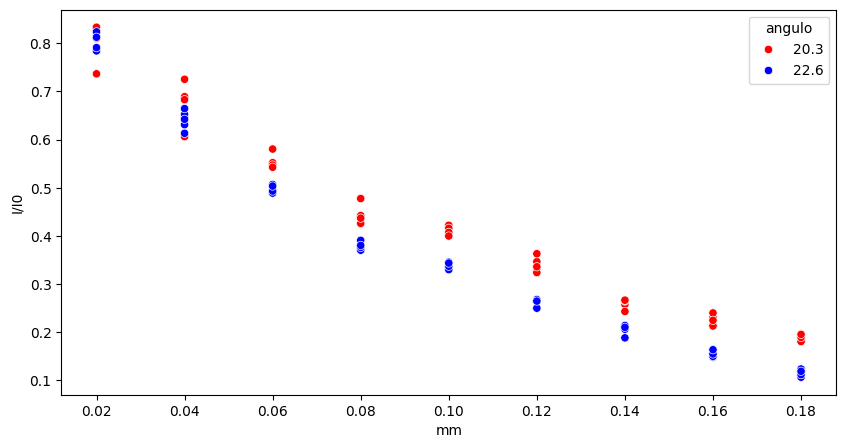

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='mm', y='I/I0', hue='angulo', palette = ['red', 'blue'] )

Podemos também plotar a média dos grupos na figura acima

<Axes: xlabel='mm', ylabel='I/I0'>

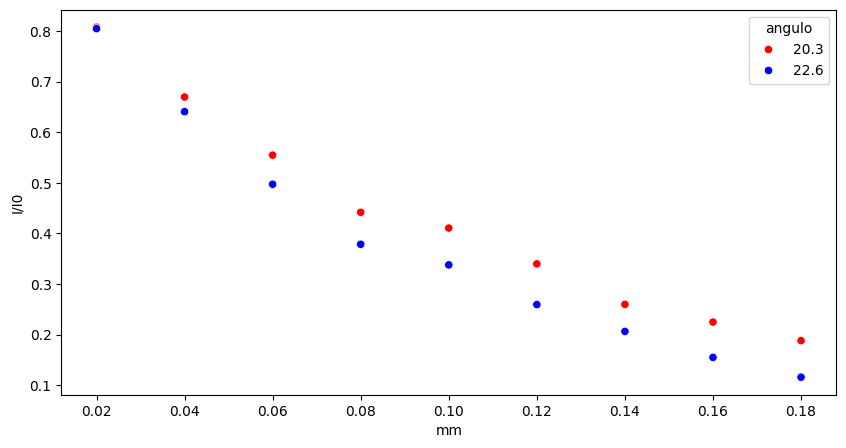

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=pd.DataFrame(df.groupby(["angulo", "mm"])['I/I0'].mean()).reset_index(), x='mm', y='I/I0', hue='angulo', palette = ['red', 'blue'] )

In [23]:
ln1 = LinearRegression(fit_intercept=False) # olhar anotações, não vamos usar o intercept
ln2 = LinearRegression(fit_intercept=False)

In [24]:
df_203 = df[df['angulo'] == 20.3]
df_226 = df[df['angulo'] == 22.6]

In [25]:
ln1 = ln1.fit(df_203[['mm']] * 10, np.log(df_203['I/I0'].values))
ln2 = ln2.fit(df_226[['mm']] * 10, np.log(df_226['I/I0'].values))

In [26]:
ln1.coef_[0]

np.float64(-0.9373467038929341)

In [27]:
ln2.coef_[0]

np.float64(-1.15824946048842)

podemos observar nossas regressões:

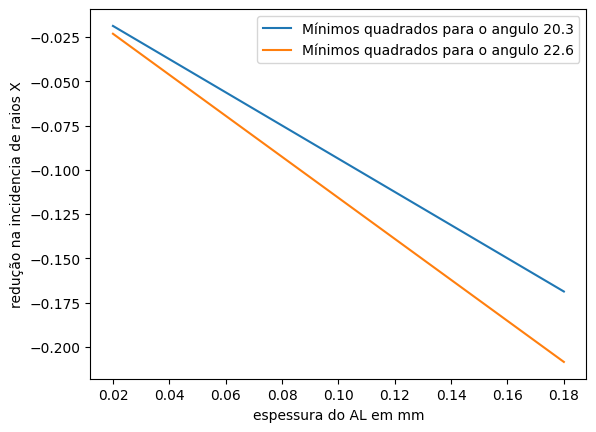

In [47]:
sns.lineplot(x=df_203[['mm']].drop_duplicates()['mm'].values,y=ln1.predict(df_203[['mm']].drop_duplicates()[['mm']]), label="Mínimos quadrados para o angulo 20.3")
sns.lineplot(x=df_226[['mm']].drop_duplicates()['mm'].values,y=ln2.predict(df_226[['mm']].drop_duplicates()[['mm']]), label="Mínimos quadrados para o angulo 22.6")
plt.xlabel('espessura do AL em mm')
plt.ylabel('redução na incidencia de raios X')
plt.show()